In [1]:
from cv2 import normalize
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
seed = np.random.RandomState(42)

In [3]:
# Create synthetic dataset
X, y = make_classification(n_samples=10000, 
    n_features=30, 
    n_informative=10,
    n_redundant=10, 
    n_classes= 2,
    weights=[0.2,0.8], # 20% of the targets will be 0, 80% will be 1. default is 50/50
    flip_y=0.1,
    random_state=seed)

In [4]:
df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
print(df.shape)

(10000, 31)


In [5]:
df.columns = df.columns.astype(str)

In [6]:
df.columns.values[-1] = 'target'

In [7]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', 'target'],
      dtype='object')

In [8]:
# Modelling original matrix X
print('Shape of X: ', df.drop(columns=['target']).shape)

Shape of X:  (10000, 30)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), 
                                                    df.target, 
                                                    test_size = 0.30, 
                                                    random_state=seed)

clf = RandomForestClassifier(random_state=seed)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

========== Result model applied: X without SVD ==========
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       691
           1       0.90      0.97      0.94      2309

    accuracy                           0.90      3000
   macro avg       0.89      0.81      0.84      3000
weighted avg       0.89      0.90      0.89      3000



C:\Users\thiag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


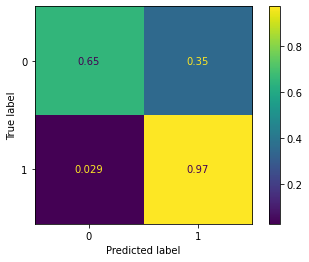

In [10]:
print('========== Result model applied: X without SVD ==========')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')
plt.show()

In [11]:
clf.feature_importances_

array([0.03447807, 0.01666472, 0.02955389, 0.01663091, 0.03448201,
       0.03235325, 0.04921936, 0.03761234, 0.01748161, 0.04524699,
       0.01724952, 0.01716265, 0.03049705, 0.01721551, 0.04651971,
       0.05863613, 0.02743412, 0.03195353, 0.0922093 , 0.02914742,
       0.03696744, 0.02308768, 0.05069378, 0.01809248, 0.02857675,
       0.01628427, 0.01890745, 0.01701994, 0.0431902 , 0.06543194])

In [12]:
df_fi = pd.concat([pd.DataFrame(df.columns),pd.DataFrame(clf.feature_importances_)], 
                  axis=1)
df_fi.columns = df_fi.columns.astype(str)
df_fi.columns.values[0] = 'columns'
df_fi.columns.values[1] = 'feature_importance'

In [13]:
df_fi.sort_values('feature_importance', ascending=False).head(20)

,columns,feature_importance
18,18,0.092209
29,29,0.065432
15,15,0.058636
22,22,0.050694
6,6,0.049219
14,14,0.046520
9,9,0.045247
28,28,0.043190
7,7,0.037612
20,20,0.036967


In [97]:
# lista_columns = list(df.columns)

# random.shuffle(lista_columns)

# df = df[lista_columns]

# df.head().T

In [16]:
# Applying SVD 
U, Sigma, V_T = np.linalg.svd(df.drop(columns=['target']), full_matrices = False) #economy
Sigma = np.diag(Sigma)

In [17]:
np.diag(Sigma)

array([6.88361996e+02, 6.15450430e+02, 4.95874231e+02, 4.10575730e+02,
       3.79499775e+02, 3.54683199e+02, 2.95686686e+02, 2.26738717e+02,
       1.57501292e+02, 1.46927217e+02, 1.02104849e+02, 1.01489049e+02,
       1.00962286e+02, 1.00495874e+02, 1.00208568e+02, 9.92723167e+01,
       9.88859947e+01, 9.85966419e+01, 9.83145007e+01, 9.77289268e+01,
       1.64938769e-13, 1.13156341e-13, 1.01118170e-13, 7.02575732e-14,
       6.07893589e-14, 5.48719152e-14, 5.20262332e-14, 5.16141705e-14,
       4.26589656e-14, 3.75933004e-14])

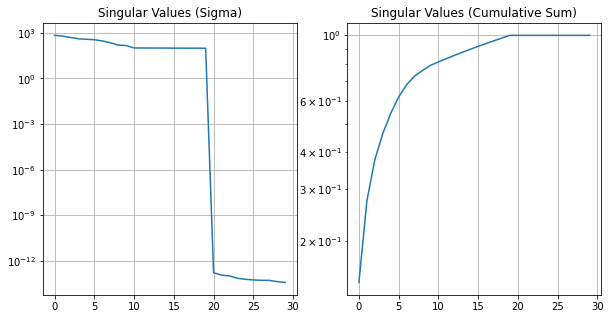

In [18]:
# Plots
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.semilogy(np.diag(Sigma))
plt.title('Singular Values (Sigma)')
plt.grid()
plt.subplot(1,2,2)
plt.semilogy(np.cumsum(np.diag(Sigma))/np.sum(np.diag(Sigma)))
plt.title('Singular Values (Cumulative Sum)')
plt.grid()
plt.show()


In [19]:
# Modelling matrix X after SVD

r = 20 # number of selected features
X_hat = U[:,:r] @ Sigma[:r,:r] @ V_T[:r,:] # @ = np.matmul
print('Shape of X after SVD: ', np.shape(X_hat))

Shape of X after SVD:  (10000, 30)


In [20]:
X

array([[ 1.77150608,  1.13120905,  2.91117117, ...,  2.27437973,
         3.82790817,  1.59098909],
       [ 0.81174429, -1.88944992, -0.70677111, ...,  0.16905643,
        -0.54564318, -1.39339019],
       [-1.77931314, -0.20766432,  0.61840673, ..., -0.1044491 ,
        -1.02036331, -2.93349962],
       ...,
       [ 0.94839272,  0.5139975 ,  0.85515344, ..., -0.37272155,
         0.51260192, -1.50866601],
       [-2.48853637, -0.80637213, -0.42198402, ...,  0.97001233,
        -4.80972152,  2.11210375],
       [ 8.02206792, -0.23315204,  6.18783377, ...,  0.48593732,
         1.94570405, -4.25149119]])

In [21]:
X_hat

array([[ 1.77150608,  1.13120905,  2.91117117, ...,  2.27437973,
         3.82790817,  1.59098909],
       [ 0.81174429, -1.88944992, -0.70677111, ...,  0.16905643,
        -0.54564318, -1.39339019],
       [-1.77931314, -0.20766432,  0.61840673, ..., -0.1044491 ,
        -1.02036331, -2.93349962],
       ...,
       [ 0.94839272,  0.5139975 ,  0.85515344, ..., -0.37272155,
         0.51260192, -1.50866601],
       [-2.48853637, -0.80637213, -0.42198402, ...,  0.97001233,
        -4.80972152,  2.11210375],
       [ 8.02206792, -0.23315204,  6.18783377, ...,  0.48593732,
         1.94570405, -4.25149119]])

In [22]:
np.diag(Sigma)

array([6.88361996e+02, 6.15450430e+02, 4.95874231e+02, 4.10575730e+02,
       3.79499775e+02, 3.54683199e+02, 2.95686686e+02, 2.26738717e+02,
       1.57501292e+02, 1.46927217e+02, 1.02104849e+02, 1.01489049e+02,
       1.00962286e+02, 1.00495874e+02, 1.00208568e+02, 9.92723167e+01,
       9.88859947e+01, 9.85966419e+01, 9.83145007e+01, 9.77289268e+01,
       1.64938769e-13, 1.13156341e-13, 1.01118170e-13, 7.02575732e-14,
       6.07893589e-14, 5.48719152e-14, 5.20262332e-14, 5.16141705e-14,
       4.26589656e-14, 3.75933004e-14])

In [106]:
df_hat = pd.DataFrame(X_hat)

In [107]:
df_hat.head().T

,0,1,2,3,4
0,-0.900645,0.498091,-1.482126,-0.973954,1.140615
1,0.307130,-0.644173,0.136662,0.076607,0.656324
2,-0.814451,-4.365114,-0.577988,-1.461552,0.032513
3,-0.891458,1.621797,-1.894520,-1.341523,-0.226209
4,-1.928909,-5.323075,-2.606716,-4.175984,-2.506741
5,-1.922618,1.644941,-1.683378,0.634796,1.074513
6,-0.694311,-0.699904,0.452200,-1.073941,-1.511153
7,-1.063299,5.694881,1.541076,0.148858,-0.397935
8,0.314910,1.781853,-0.243746,-0.073279,1.058264
9,-0.926750,1.144033,-1.444355,-2.635913,-1.253107


In [108]:
df.head().T

,0,1,2,3,4
21,-0.900645,0.498091,-1.482126,-0.973954,1.140615
20,0.307130,-0.644173,0.136662,0.076607,0.656324
18,-0.814451,-4.365114,-0.577988,-1.461552,0.032513
22,-0.891458,1.621797,-1.894520,-1.341523,-0.226209
9,-1.928909,-5.323075,-2.606716,-4.175984,-2.506741
8,-1.922618,1.644941,-1.683378,0.634796,1.074513
3,-0.694311,-0.699904,0.452200,-1.073941,-1.511153
7,-1.063299,5.694881,1.541076,0.148858,-0.397935
12,0.314910,1.781853,-0.243746,-0.073279,1.058264
28,-0.926750,1.144033,-1.444355,-2.635913,-1.253107


In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_hat, df.target, test_size = 0.30, random_state=seed)

clf_svd = RandomForestClassifier(random_state=seed)

clf_svd.fit(X_train, y_train)

y_pred = clf_svd.predict(X_test)

========== Result model applied: X after SVD ==========
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       679
           1       0.89      0.96      0.92      2321

    accuracy                           0.88      3000
   macro avg       0.86      0.77      0.80      3000
weighted avg       0.87      0.88      0.87      3000



C:\Users\thiag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


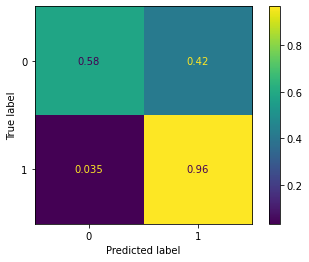

In [73]:
print('========== Result model applied: X after SVD ==========')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf_svd, X_test, y_test, normalize='true')
plt.show()

In [74]:
df_fi_svd = pd.concat([pd.DataFrame(df_hat.columns),pd.DataFrame(clf_svd.feature_importances_)], 
                       axis=1)
df_fi_svd.columns = df_fi_svd.columns.astype(str)
df_fi_svd.columns.values[0] = 'columns'
df_fi_svd.columns.values[1] = 'feature_importance'
df_fi_svd.sort_values('feature_importance', ascending=False)

,columns,feature_importance
18,18,0.138171
6,6,0.068678
15,15,0.068666
14,14,0.067879
7,7,0.062952
9,9,0.058350
4,4,0.056141
19,19,0.055095
0,0,0.050084
2,2,0.047696
